In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("height_cm.csv")
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


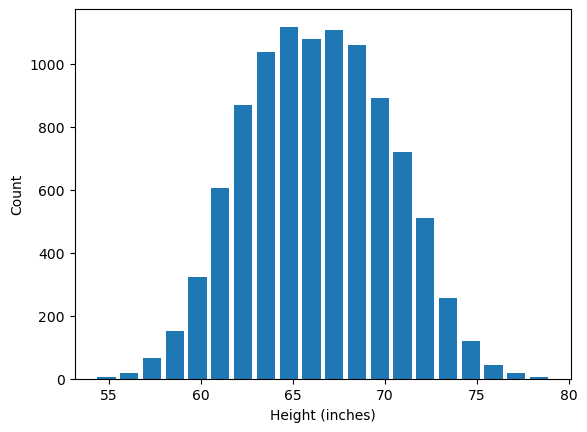

In [6]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

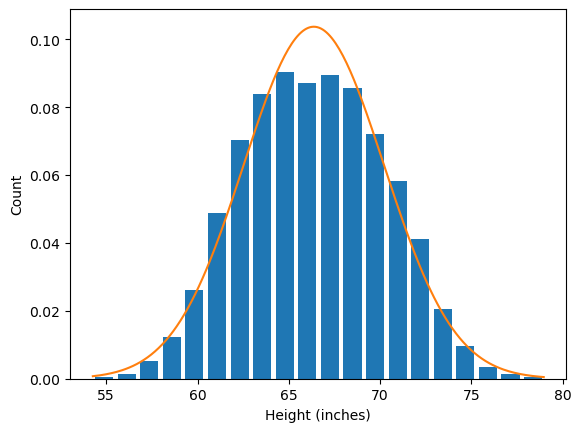

In [7]:
from scipy.stats import norm
import numpy as np
plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))

In [8]:
df.height.mean()

np.float64(66.367559754866)

In [9]:
df.height.std()

3.847528120795573

In [16]:
upper_limit = df.height.mean() + 3*df.height.std()
lower_limit = df.height.mean() - 3*df.height.std()

In [17]:
df[(df.height > upper_limit) | (df.height < lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [18]:
no_outlier = df[(df.height < upper_limit) & (df.height > lower_limit)]
no_outlier

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [20]:
df.shape

(10000, 2)

In [21]:
no_outlier.shape

(9993, 2)

## z score

In [30]:
df["z_score"] = (df.height - df.height.mean()) / df.height.std()
df.head()

,gender,height,z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [31]:
df[df.z_score > 3]

,gender,height,z_score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [32]:
df[df.z_score < -3]

,gender,height,z_score
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [36]:
df2=df[(df.z_score < 3) & (df.z_score > -3)]
df2

,gender,height,z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [34]:
df.shape

(10000, 3)

In [37]:
df2.shape

(9993, 3)